In [73]:
import pandas as pd
import seaborn as sns
import os
import sys
import warnings
import matplotlib.pyplot as plt
from scipy.stats import skew
from df_outlier import DfOutlier

In [74]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [75]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [76]:
from file_handler import FileHandler
import vis_seaborn as vs

# Data Loading

In [77]:
#Read data using the file_handler module
file_handler = FileHandler()

df = file_handler.read_csv("../data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


# Data information

In [78]:
df.size

18777

In [79]:
df.shape

(569, 33)

In [80]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


In [81]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [82]:
# save the clean dataframe to a csv file
df.to_csv('../data/data.csv', index=False)

since we have no missing values we will proceed to explotary data analysis

# EDA
# Univariate Analysis

In [83]:
# unique value counts
counts_df = df['diagnosis'].value_counts()
counts_df

B    357
M    212
Name: diagnosis, dtype: int64

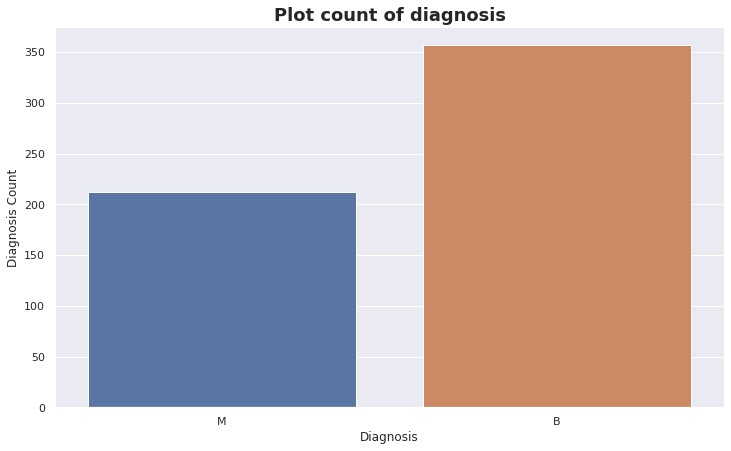

In [84]:
vs.plot_count(df, 'diagnosis', "Diagnosis", "Diagnosis Count")

In [85]:
#we exclude id for numerical columns 
y = df.diagnosis # M or B
x = df.drop(['id', 'diagnosis'], axis=1)

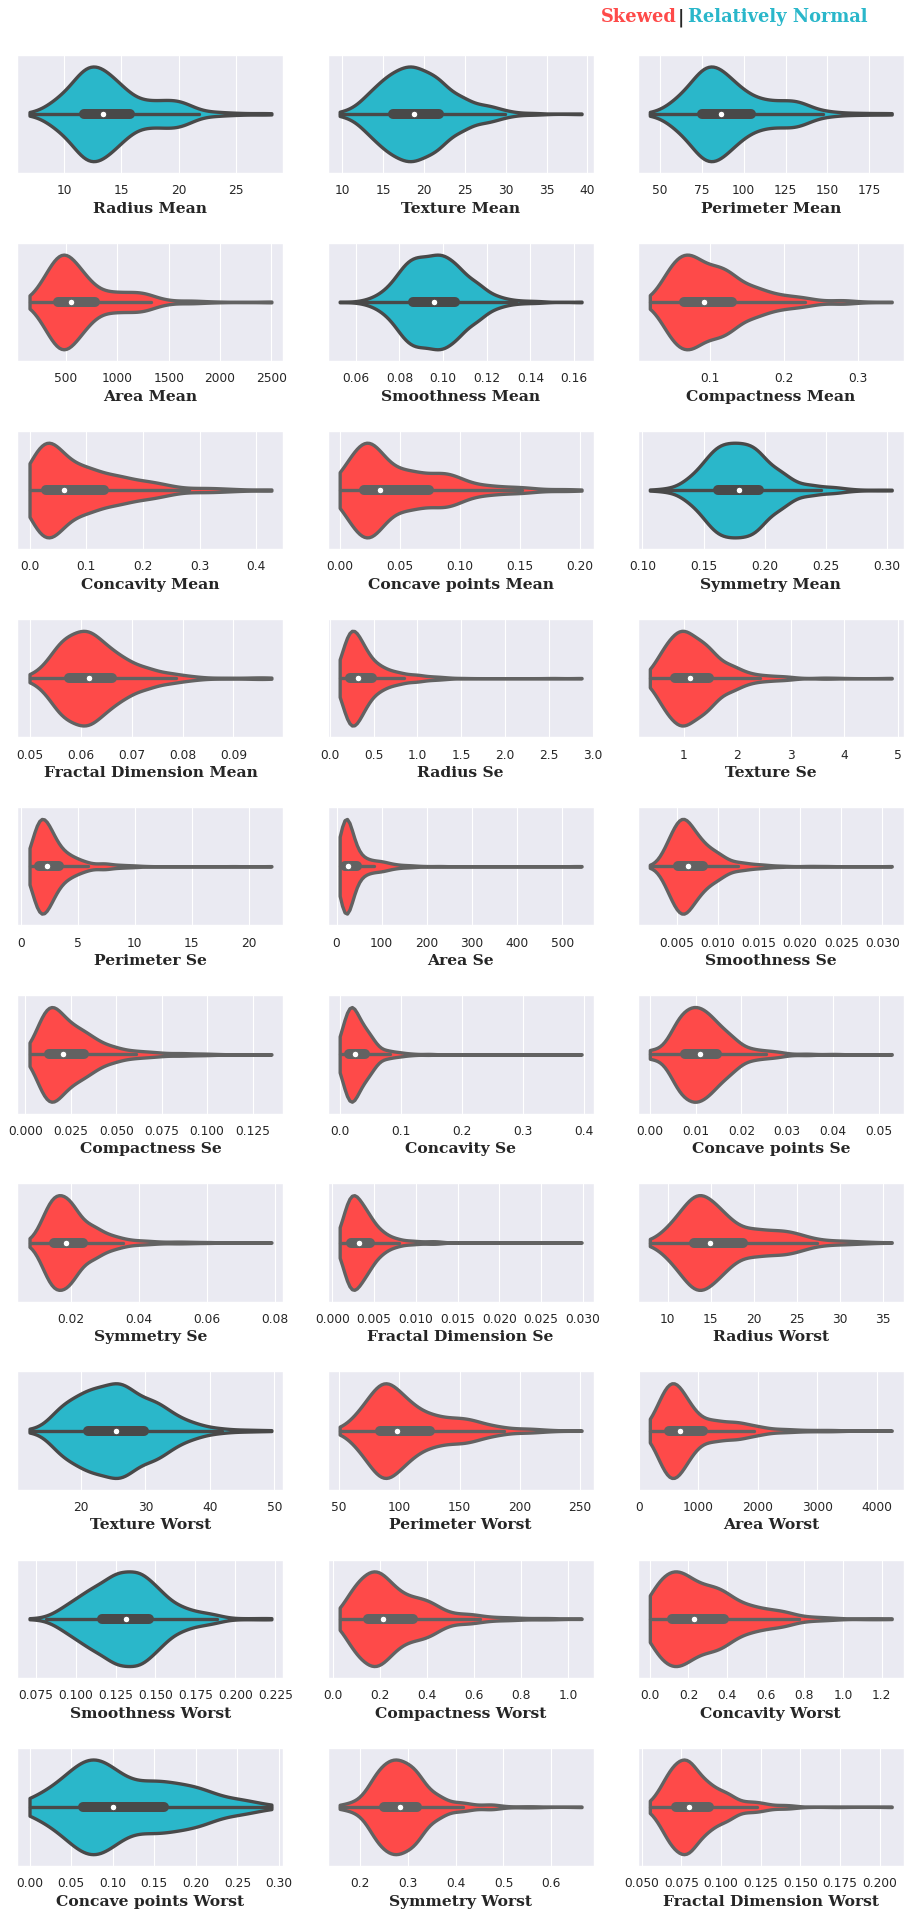

In [86]:
colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # skewness
    if skew(x[col])>1:
        color = colors[0]
    else:
        color = colors[1]

    ## plots
    sns.violinplot(x[col], ax =ax,
                   color = color, cut =0,
                   inner = 'box',
                   alpha = 1,linewidth = 3, edgecolor = 'solidblack', saturation =1 )

    ## plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':14, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 3,h_pad = 2.5, w_pad = 2.5)

fig.text(0.65,1, "Skewed",{'font':'serif','size':16, 'weight':'bold', 'color':colors[0]})
fig.text(0.73,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.74,1, "Relatively Normal",{'font':'serif','size':16, 'weight':'bold','color':colors[1]})

fig.show()

# Bivariate Analysis

## Diagnosis column with other features

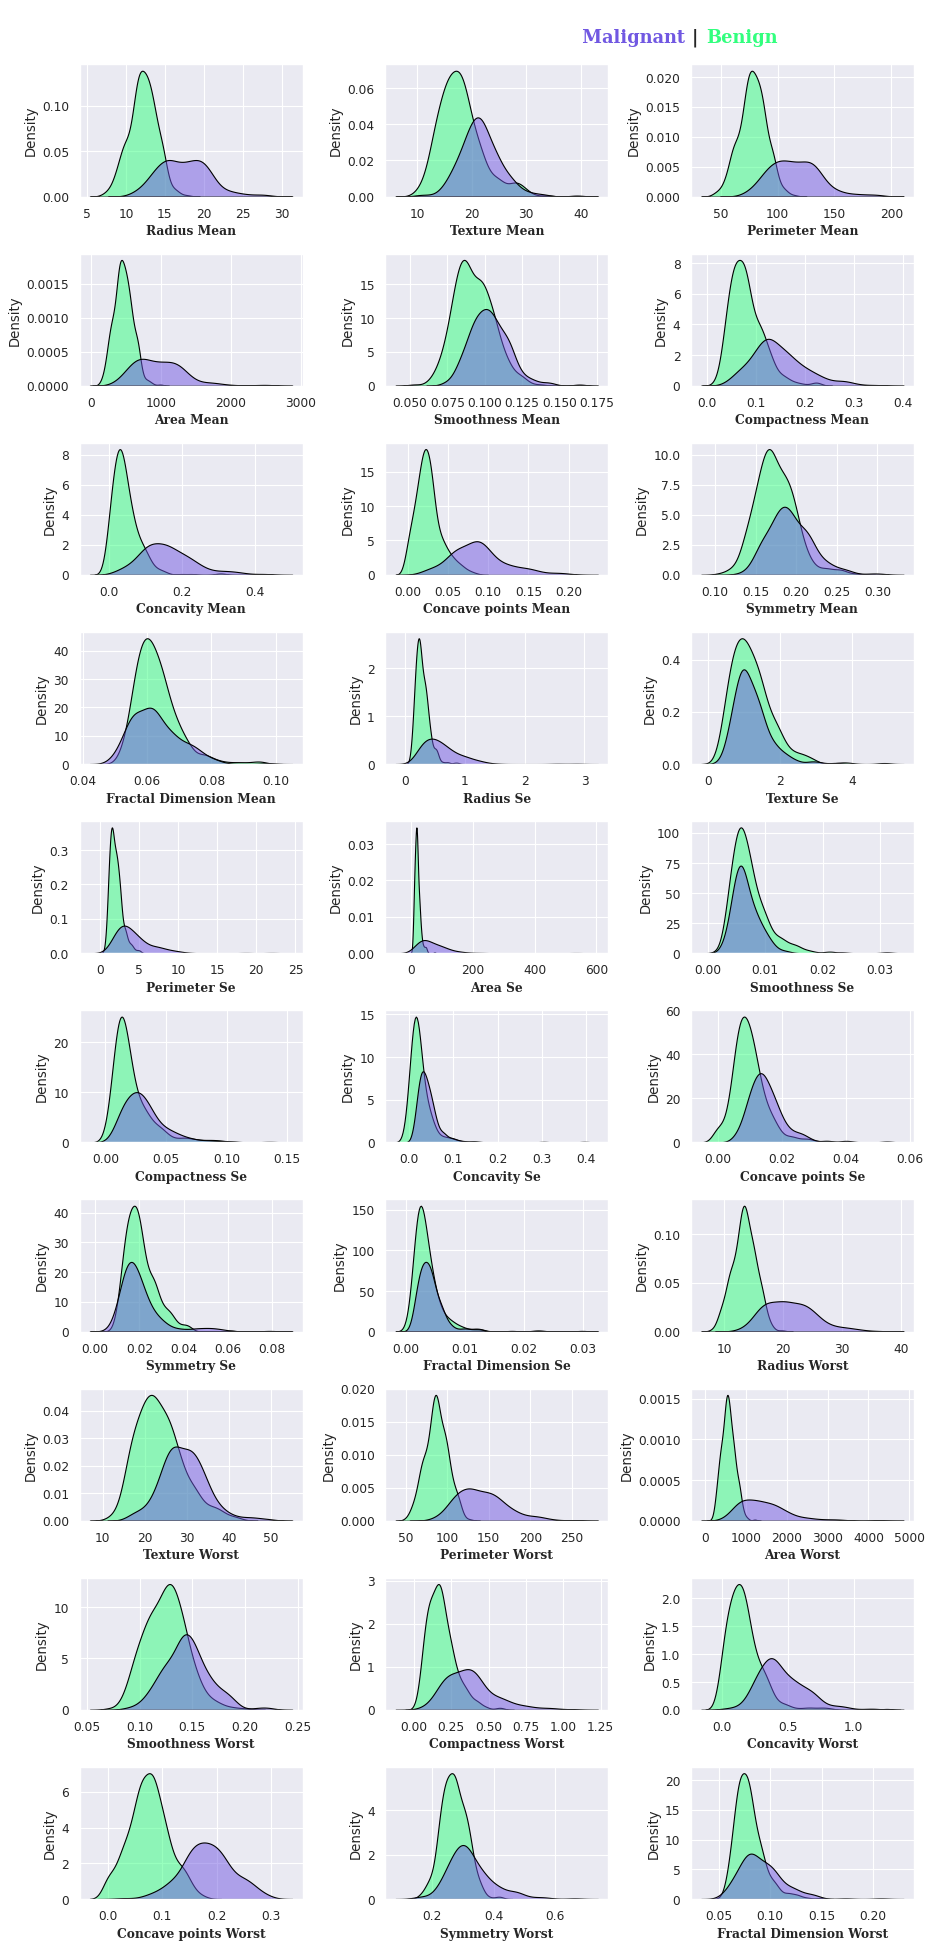

In [87]:
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # plots
    sns.kdeplot(df[col], ax = ax, shade = True ,
                palette=["#7158e2", "#32ff7e"],
                alpha = 0.5, linewidth = 1, ec = 'black',
                hue = df['diagnosis'], hue_order = ['M','B'],
                legend = False)

    # plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':11, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 2,h_pad = 1, w_pad = 1)

fig.text(0.615,1, "\n Malignant",{'font':'serif','size':16, 'weight':'bold', 'color':"#7158e2"}, alpha = 1)
fig.text(0.735,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.75,1, "Benign",{'font':'serif','size':16, 'weight':'bold','color':"#32ff7e"}, alpha = 1)

fig.show()

# Handling outliers

In [88]:
outlier_handler = DfOutlier(df)
columns = df.select_dtypes('float64').columns.tolist()
df_ = outlier_handler.getOverview(columns)
vs.view_df(df_, ['Min', 'Q1', 'Median', "Q3", "Max", "IQR", "Lower fence", "Upper fence", "Skew", "Number_of_outliers"])

,Name of columns,Min,Q1,Median,Q3,Max,IQR,Lower fence,Upper fence,Skew,Number_of_outliers,Percentage_of_outliers
0,area_se,6.802000,17.850000,24.530000,45.190000,542.200000,27.340000,-23.160000,86.200000,5.447186,65,0.04%
1,radius_se,0.111500,0.232400,0.324200,0.478900,2.873000,0.246500,-0.137350,0.848650,3.088612,38,0.03%
2,perimeter_se,0.757000,1.606000,2.287000,3.357000,21.980000,1.751000,-1.020500,5.983500,3.443615,38,0.03%
3,area_worst,185.200000,515.300000,686.500000,1084.000000,4254.000000,568.700000,-337.750000,1937.050000,1.859373,35,0.02%
4,smoothness_se,0.001713,0.005169,0.006380,0.008146,0.031130,0.002977,0.000703,0.012612,2.314450,30,0.02%
5,fractal_dimension_se,0.000895,0.002248,0.003187,0.004558,0.029840,0.002310,-0.001217,0.008023,3.923969,28,0.02%
6,compactness_se,0.002252,0.013080,0.020450,0.032450,0.135400,0.019370,-0.015975,0.061505,1.902221,28,0.02%
7,symmetry_se,0.007882,0.015160,0.018730,0.023480,0.078950,0.008320,0.002680,0.035960,2.195133,27,0.02%
8,area_mean,143.500000,420.300000,551.100000,782.700000,2501.000000,362.400000,-123.300000,1326.300000,1.645732,25,0.02%
9,fractal_dimension_worst,0.055040,0.071460,0.080040,0.092080,0.207500,0.020620,0.040530,0.123010,1.662579,24,0.02%


In [90]:
outlier_handler.replace_outliers_with_fences(x.columns)

In [91]:
file_handler.to_csv(outlier_handler.df, '../data/data.csv')